Tout d'abord l'importation des librairies utiles.

Numpy pour l'intervalle de temps (linspace);

Scipy pour faire les equations différentielles;

Matplotlib pour faire le graphique;

IPython pour inclure les formules.

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from IPython.display import Latex

Déterminons la population totale N, puis le nombre initial de personnes infectées ainsi que les guéries immunisées, respectivement I0 et R0. (Nous pouvons les modifier à souhait)

In [2]:
N = 1000000
I0, R0 = 1, 0

Etablissons ensuite le taux de contagion β, le taux moyen de rétablissement γ. (Nous pouvons les modifier à souhait)

S0 est le nombre de personnes initial qui n'est ni infécté ni guéri avec immunité, ils sont susceptibles d'être infectés.

In [3]:
beta, gamma = 3, 91./100
S0 = N - I0 - R0

Déterminons le nombre de jours que le modèle va simuler. (Nous pouvons le modifier à souhait)

In [4]:
t = np.linspace(0, 100, 100)

Voici les équations différentielles qui vont nous permettre de faire la modélisation nommée SIR.

\begin{align*}
    \frac{dS}{dt} &= -\frac{\beta SI}{N} \\
    \frac{dI}{dt} &= \frac{\beta SI}{N}-\gamma I \\
    \frac{dR}{dt} &= \gamma I \\
\end{align*}

In [5]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

Entrons les conditions initiales à t=0 puis faisons calculer la simulation à l'ordinateur.

In [6]:
y0 = S0, I0, R0
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

Enfin construisons le graphique avec les trois courbes S(t), I(t) et R(t).

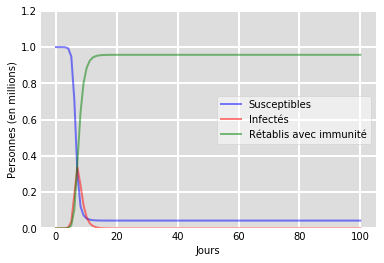

In [7]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000000, 'b', alpha=0.5, lw=2, label='Susceptibles')
ax.plot(t, I/1000000, 'r', alpha=0.5, lw=2, label='Infectés')
ax.plot(t, R/1000000, 'g', alpha=0.5, lw=2, label='Rétablis avec immunité')
ax.set_xlabel('Jours')
ax.set_ylabel('Personnes (en millions)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

Compliquons le modèle pour y ajouter l'élément du temps d'incubation.

In [8]:
E0, I0, R0 = 1, 0, 0
S0 = N - E0 - R0 - R0
sigma = 1./5

Voici les équations différentielles qui vont nous permettre de faire la modélisation nommée SEIR.

\begin{align*}
    \frac{dS}{dt} &= -\frac{\beta SI}{N} \\
    \frac{dE}{dt} &= \frac{\beta SI}{N}-\sigma E \\
    \frac{dI}{dt} &= \sigma E - \gamma I \\
    \frac{dR}{dt} &= \gamma I \\
\end{align*}

In [9]:
def derivSEIR(y, t, N, beta, gamma, sigma):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - sigma * E
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

In [10]:
y0 = S0, E0, I0, R0
ret = odeint(derivSEIR, y0, t, args=(N, beta, gamma, sigma))
S, E, I, R = ret.T

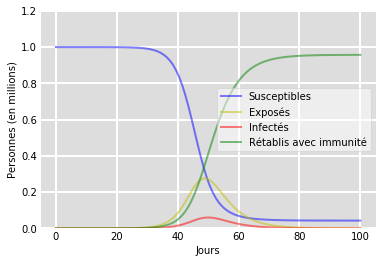

In [11]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000000, 'b', alpha=0.5, lw=2, label='Susceptibles')
ax.plot(t, E/1000000, 'y', alpha=0.5, lw=2, label='Exposés')
ax.plot(t, I/1000000, 'r', alpha=0.5, lw=2, label='Infectés')
ax.plot(t, R/1000000, 'g', alpha=0.5, lw=2, label='Rétablis avec immunité')
ax.set_xlabel('Jours')
ax.set_ylabel('Personnes (en millions)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()